In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.15, shuffle=True)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool2)
flat = Flatten()(conv3)

dense4 = Dense(64, activation='relu') (flat)
drop4 = Dropout(rate=0.2)(dense4)
outputs = Dense(10, activation='softmax')(drop4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, 
                                monitor='val_accuracy', 
                                verbose=1,
                                save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

Epoch 1/100
297/300 [============================>.] - ETA: 0s - loss: 0.3707 - accuracy: 0.8870
Epoch 1: val_accuracy improved from -inf to 0.97600, saving model to /content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/mnist-1-0.07828-0.97600.hdf5
300/300 [==============================] - 17s 21ms/step - loss: 0.3683 - accuracy: 0.8878 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 2/100
300/300 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9718
Epoch 2: val_accuracy improved from 0.97600 to 0.98447, saving model to /content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/mnist-2-0.04477-0.98447.hdf5
300/300 [==============================] - 4s 15ms/step - loss: 0.0929 - accuracy: 0.9718 - val_loss: 0.0448 - val_accuracy: 0.9845
Epoch 3/100
300/300 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9812
Epoch 3: val_accuracy improved from 0.98447 to 0.98824, saving model to /content/drive/MyDr

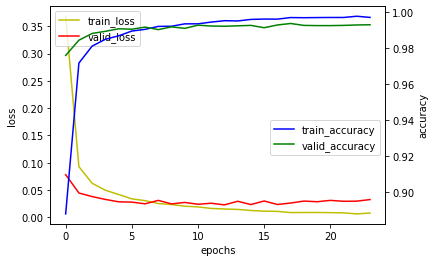

In [6]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.show()


In [7]:
saved_path = '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/mnist-18-0.02634-0.99376.hdf5'

loaded_model = tf.keras.models.load_model(saved_path)

print(f"Loss, Accuracy {loaded_model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 0s 5ms/step - loss: 0.0311 - accuracy: 0.9907
Loss, Accuracy [0.03106170892715454, 0.9906666874885559]


In [8]:
!ls -la '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/'

total 13821
-rw------- 1 root root  400264 Mar  3 01:49 mnist-1-0.06908-0.97929.hdf5
-rw------- 1 root root 1174704 Mar  3 02:00 mnist-1-0.07828-0.97600.hdf5
-rw------- 1 root root 1174704 Mar  3 02:01 mnist-11-0.02414-0.99282.hdf5
-rw------- 1 root root 1174704 Mar  3 02:01 mnist-17-0.02375-0.99294.hdf5
-rw------- 1 root root 1174704 Mar  3 02:01 mnist-18-0.02634-0.99376.hdf5
-rw------- 1 root root  400264 Mar  3 01:49 mnist-2-0.04247-0.98635.hdf5
-rw------- 1 root root 1174704 Mar  3 02:00 mnist-2-0.04477-0.98447.hdf5
-rw------- 1 root root  400264 Mar  3 01:50 mnist-3-0.03548-0.98918.hdf5
-rw------- 1 root root 1174704 Mar  3 02:00 mnist-3-0.03822-0.98824.hdf5
-rw------- 1 root root 1174704 Mar  3 02:00 mnist-4-0.03299-0.98941.hdf5
-rw------- 1 root root  400264 Mar  3 01:50 mnist-4-0.03335-0.98953.hdf5
-rw------- 1 root root 1174704 Mar  3 02:00 mnist-5-0.02863-0.99082.hdf5
-rw------- 1 root root  400264 Mar  3 01:50 mnist-5-0.03065-0.99047.hdf5
-rw------- 1 root root  400264 Mar  

In [11]:
!rm '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/*'

rm: cannot remove '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/*': No such file or directory


In [12]:
!cd '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/'

In [16]:
!rm '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/'*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(32, (3, 3), activation='relu')
        self.pool1 = MaxPool2D()
        self.conv2 = Conv2D(64, (3, 3), activation='relu')
        self.pool2 = MaxPool2D()
        self.conv3 = Conv2D(64, (3, 3), activation='relu')
        self.flat = Flatten()
        self.dense4 = Dense(64, activation='relu')
        self.drop = Dropout(0.2)
        self.outputs = Dense(10, activation='softmax')

    #Forward 
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.flat(net)
        net = self.dense4(net)
        net = self.drop(net)
        net = self.outputs(net)

        return net

model = MNISTModel()
inputs = Input(shape=(28, 28, 1))
model(inputs)

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           multiple                  36928     
                                                                 
 flatten (Flatten)           multiple                  

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/'
model_path = f"{MODEL_SAVE_FOLDER}mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, 
                                monitor='val_accuracy', 
                                verbose=1,
                                save_weights_only=True,
                                save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

Epoch 1/100
298/300 [============================>.] - ETA: 0s - loss: 0.0202 - accuracy: 0.9937
Epoch 1: val_accuracy improved from -inf to 0.99294, saving model to /content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/mnist-1-0.02614-0.99294.hdf5
300/300 [==============================] - 6s 15ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0261 - val_accuracy: 0.9929
Epoch 2/100
299/300 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9944
Epoch 2: val_accuracy did not improve from 0.99294
300/300 [==============================] - 4s 14ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0305 - val_accuracy: 0.9915
Epoch 3/100
296/300 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9955
Epoch 3: val_accuracy did not improve from 0.99294
300/300 [==============================] - 4s 13ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0309 - val_accuracy: 0.9919
Epoch 4/100
296/300 [===============

In [4]:
saved_path = '/content/drive/MyDrive/2021 K 디지털 - 멀티/공유폴더/실습 폴더/models/mnist-8-0.02168-0.99318.hdf5'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 10s 5ms/step - loss: 0.0180 - accuracy: 0.9940
Loss, Accuracy [0.018031075596809387, 0.9940000176429749]


In [5]:
output = model(test_images)
output.shape

TensorShape([1500, 10])

In [6]:
output[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8.5458021e-12, 9.9999964e-01, 1.2493474e-08, 1.6093653e-10,
       2.9374229e-07, 9.9248227e-09, 1.4118957e-09, 5.6441561e-08,
       3.3616448e-08, 1.8332422e-08], dtype=float32)>

In [7]:
import numpy as np
np.argmax(output[0])

1

In [9]:
test_labels[0]

1